In [6]:
import tskit, msprime, pyslim
import numpy as np
import IPython
from IPython.display import SVG

In [4]:
%%time

ts = msprime.simulate(1000, Ne=1e4, length=1e8, recombination_rate=1e-8, mutation_rate=1e-8)
print(f"Number of trees: {ts.num_trees}")

Number of trees: 272940
CPU times: user 1min 10s, sys: 204 ms, total: 1min 10s
Wall time: 1min 10s


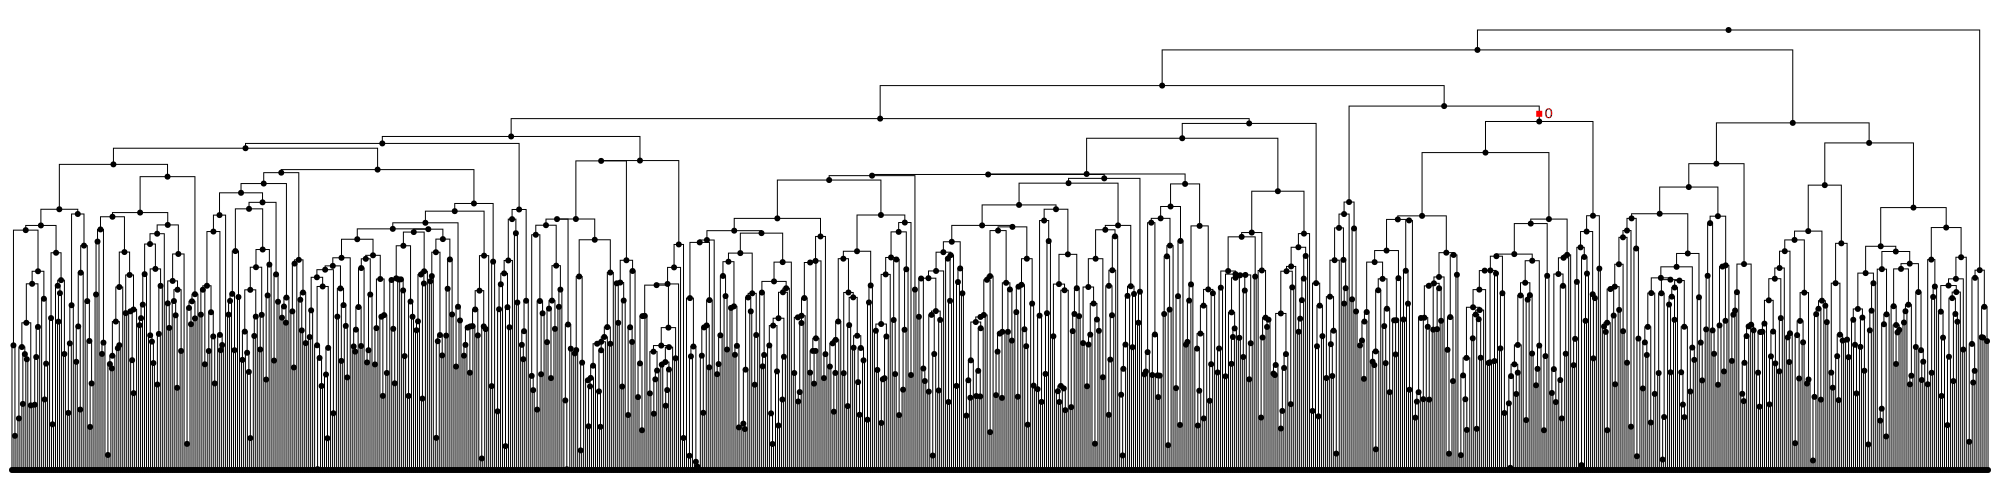

In [12]:
SVG(ts.first().draw_svg(size=(2000,500), node_labels={}, tree_height_scale="log_time"))

In [11]:
help(ts.first().draw_svg)

Help on method draw_svg in module tskit.trees:

draw_svg(path=None, *, size=None, tree_height_scale=None, max_tree_height=None, node_labels=None, mutation_labels=None, root_svg_attributes=None, style=None, order=None, force_root_branch=None, **kwargs) method of tskit.trees.Tree instance
    Return an SVG representation of a single tree.
    
    When working in a Jupyter notebook, use the ``IPython.display.SVG`` function
    to display the SVG output from this function inline in the notebook::
    
        >>> SVG(tree.draw_svg())
    
    The elements in the tree are grouped according to the structure of the tree,
    using `SVG groups <https://www.w3.org/TR/SVG2/struct.html#Groups>`_. This allows
    easy styling and manipulation of elements and subtrees. Elements in the SVG file
    are marked with SVG classes so that they can be targetted, allowing
    different components of the drawing to be hidden, styled, or otherwise
    manipulated. For example, when drawing (say) the first t

In [21]:
%%time

ts = msprime.simulate(1000, Ne=1e4, length=1e8, recombination_rate=1e-8, mutation_rate=1e-8,
                     model=msprime.BetaCoalescent(alpha=1.05))
print(f"Number of trees: {ts.num_trees}")

Number of trees: 22199
CPU times: user 7.64 s, sys: 0 ns, total: 7.64 s
Wall time: 7.65 s


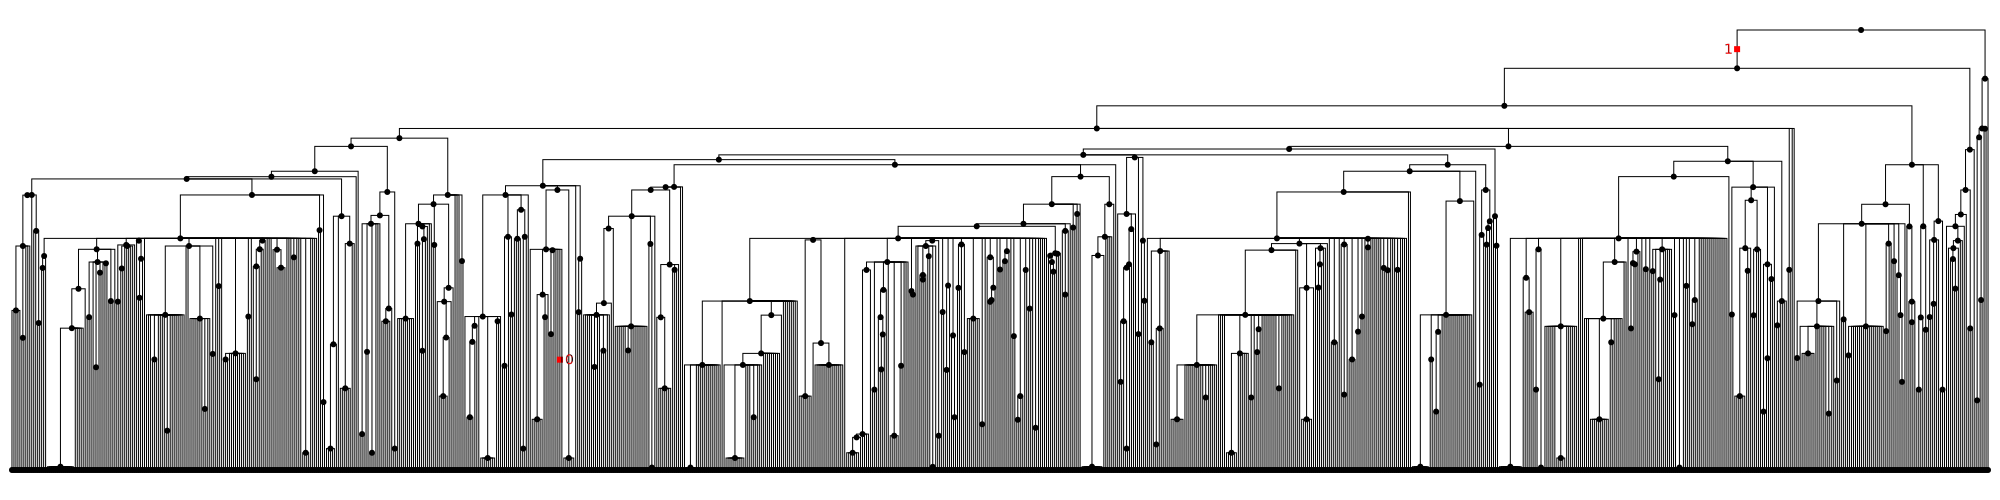

In [22]:
SVG(ts.first().draw_svg(size=(2000,500), node_labels={}, tree_height_scale="log_time"))

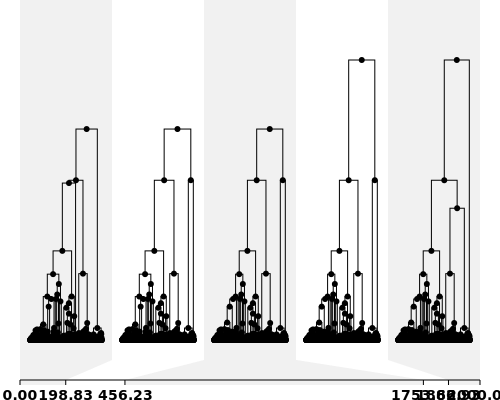

In [51]:
ts = msprime.simulate(500, Ne=1e4, length=2e3,
                      recombination_rate=1e-8)
SVG(ts.draw_svg(size=(500,400), node_labels={}))

In [55]:
ts.provenance(0)

{'id': 0, 'timestamp': '2020-10-27T22:25:12.408540', 'record': '{"schema_version": "1.0.0", "software": {"name": "msprime", "version": "0.7.5.dev472+ng570a0189"}, "parameters": {"command": "simulate", "sample_size": 500, "Ne": 10000.0, "length": 2000.0, "discrete_genome": null, "recombination_rate": 1e-08, "recombination_map": null, "mutation_rate": null, "population_configurations": null, "pedigree": null, "migration_matrix": null, "demographic_events": null, "samples": null, "model": null, "record_migrations": false, "random_seed": 1913378874, "mutation_generator": null, "from_ts": null, "start_time": null, "end_time": null, "record_full_arg": false, "num_labels": null, "record_provenance": true, "gene_conversion_rate": null, "gene_conversion_track_length": null, "demography": null, "replicate_index": 0}, "environment": {"os": {"system": "Linux", "node": "skua", "release": "5.8.0-2-amd64", "version": "#1 SMP Debian 5.8.10-1 (2020-09-19)", "machine": "x86_64"}, "python": {"implementat

# stdpopsim

In [23]:
import stdpopsim

In [24]:
pop0 = msprime.PopulationConfiguration(sample_size=3, initial_size = 500)
pop1 = msprime.PopulationConfiguration(sample_size=3, initial_size = 500)
M = np.array([[0, 0.05],
              [0.02, 0]])
admixture_event  = msprime.MassMigration(time = 50, source = 0, dest = 1, proportion = 0.3)
divergence_event = msprime.MassMigration(
        time = 200, source = 1, dest = 0, proportion = 1)
rate_change = msprime.MigrationRateChange(
    time = 200, rate = 0, matrix_index=None)

ddb = msprime.DemographyDebugger(
    population_configurations=[pop0, pop1], migration_matrix = M,
    demographic_events=[admixture_event, divergence_event, rate_change])
ddb.print_history()

Epoch: 0 -- 50.0 generations
     start     end      growth_rate |     0        1    
   -------- --------       -------- | -------- -------- 
0 |   500      500                0 |     0      0.05   
1 |   500      500                0 |   0.02       0    

Events @ generation 50.0
   - Mass migration: Lineages moved with probability 0.3 backwards in time with source 0 & dest 1
                     (equivalent to migration from 1 to 0 forwards in time)
Epoch: 50.0 -- 200.0 generations
     start     end      growth_rate |     0        1    
   -------- --------       -------- | -------- -------- 
0 |   500      500                0 |     0      0.05   
1 |   500      500                0 |   0.02       0    

Events @ generation 200.0
   - Mass migration: Lineages moved with probability 1 backwards in time with source 1 & dest 0
                     (equivalent to migration from 0 to 1 forwards in time)
   - Migration rate change to 0 everywhere
Epoch: 200.0 -- inf generations
     sta

In [91]:
species = stdpopsim.get_species("AraTha")
contig = species.get_contig("chr1", genetic_map="SalomeAveraged_TAIR7")
model = stdpopsim.IsolationWithMigration(NA=5000, N1=4000, N2=1000, T=1000, M12=0, M21=0)
samples = model.get_samples(50, 50)
engine = stdpopsim.get_engine("msprime")
ts = engine.simulate(model, contig, samples, seed=13)

In [92]:
pop_samples = [ts.samples(0), ts.samples(1)]
sfs = ts.allele_frequency_spectrum(sample_sets=pop_samples, polarised=True, span_normalise=False)

In [86]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

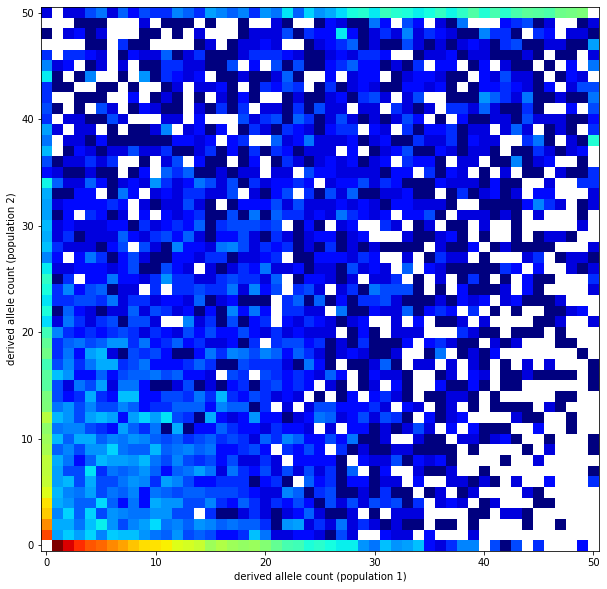

In [93]:
import allel
allel.plot_joint_sfs(sfs);